#### Netflix Project

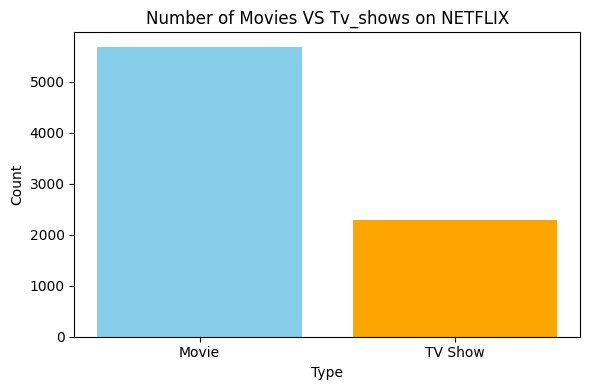

In [ ]:
#step 1 : import required liabraries
import pandas as pd
import matplotlib.pyplot as plt

# load the data
df = pd.read_csv('netflix_titles.csv')

#now to clean data

df = df.dropna( subset =['type','release_year','rating','country','duration'] )
type_counts = df['type'].value_counts()
#here it will return values in key values form 
# movies 5400,tv_shows 2200


#plotting:
plt.figure(figsize=(6,4))
plt.bar(type_counts.index ,type_counts.values , color = ['skyblue','orange'])
# type_counts.index → x-axis labels (Movie, TV Show).
# type_counts.values → y-axis values (the counts).

plt.title('Number of Movies VS Tv_shows on NETFLIX')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')


#### pie chart for movies rating

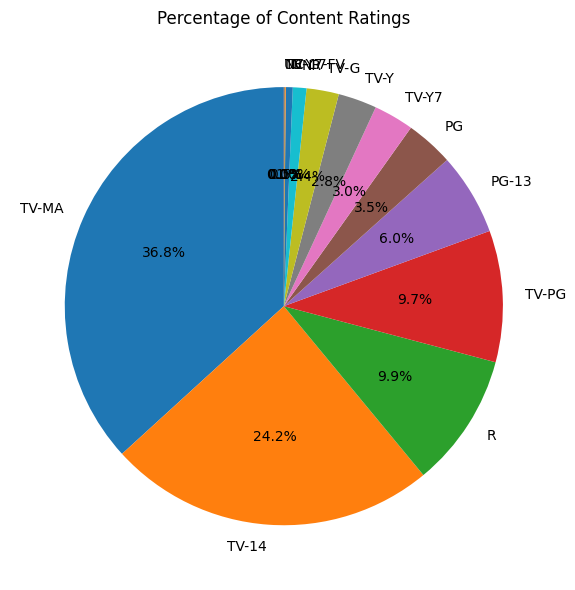

In [4]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize = (8,6))
plt.pie(rating_counts , labels = rating_counts.index , autopct ='%1.1f%%' ,startangle=90)
plt.title('Percentage of Content Ratings')
plt.tight_layout()
plt.savefig('rating_counts.png')
plt.show()

#### movies duration

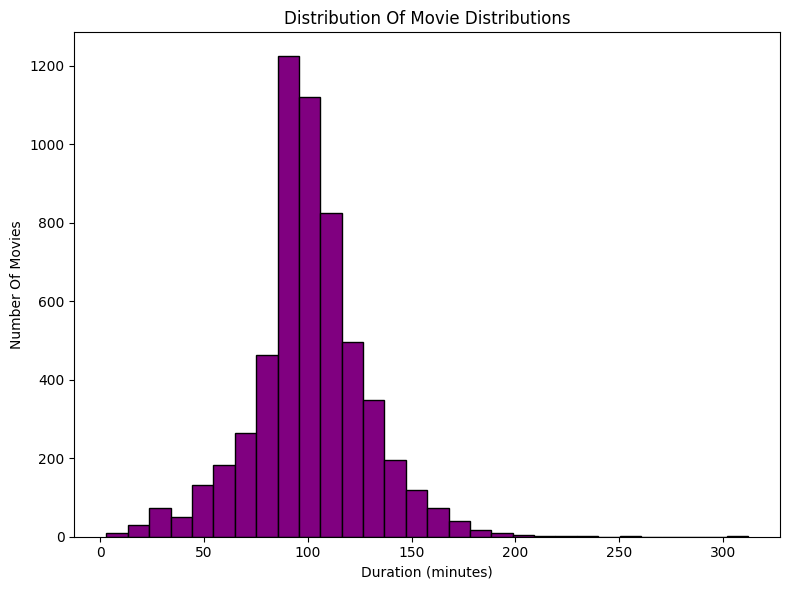

In [5]:
movie_df = df[df['type']=='Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)
plt.figure(figsize = (8,6))
plt.hist(movie_df['duration_int'],bins = 30 ,color ='purple',edgecolor = 'black')
plt.title('Distribution Of Movie Distributions')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number Of Movies')
plt.tight_layout()
plt.savefig('movie_duration.png')
plt.show()

#### scatter plot for release year vs number of shows

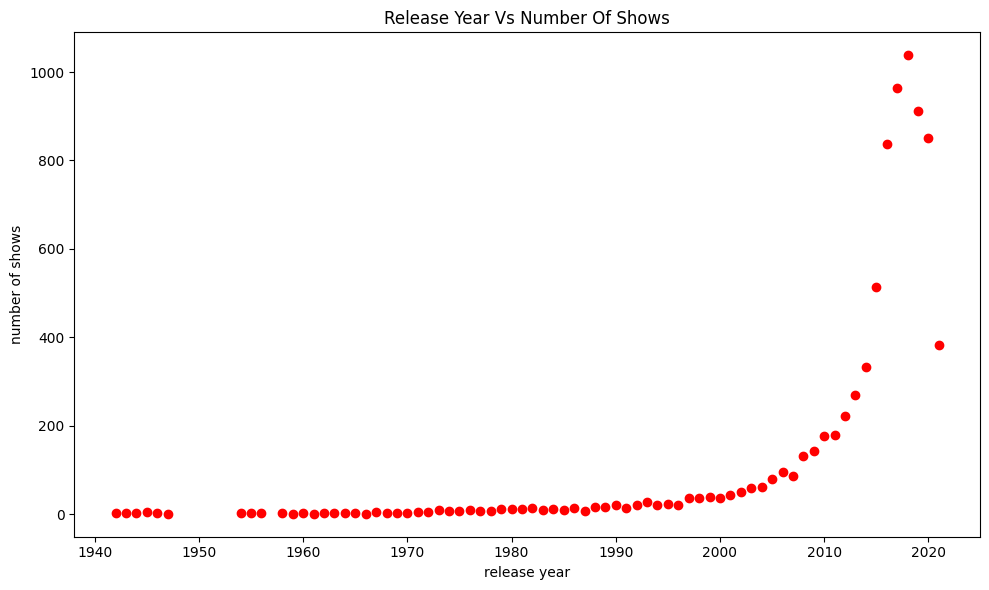

In [6]:
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize =(10,6))
plt.scatter(release_counts.index,release_counts.values,color ='red')
plt.title('Release Year Vs Number Of Shows')
plt.xlabel('release year')
plt.ylabel('number of shows')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show()


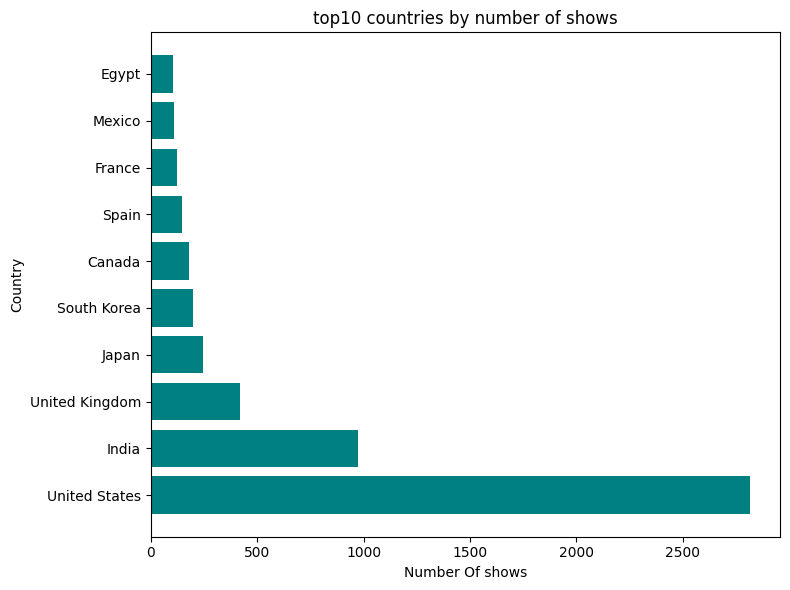

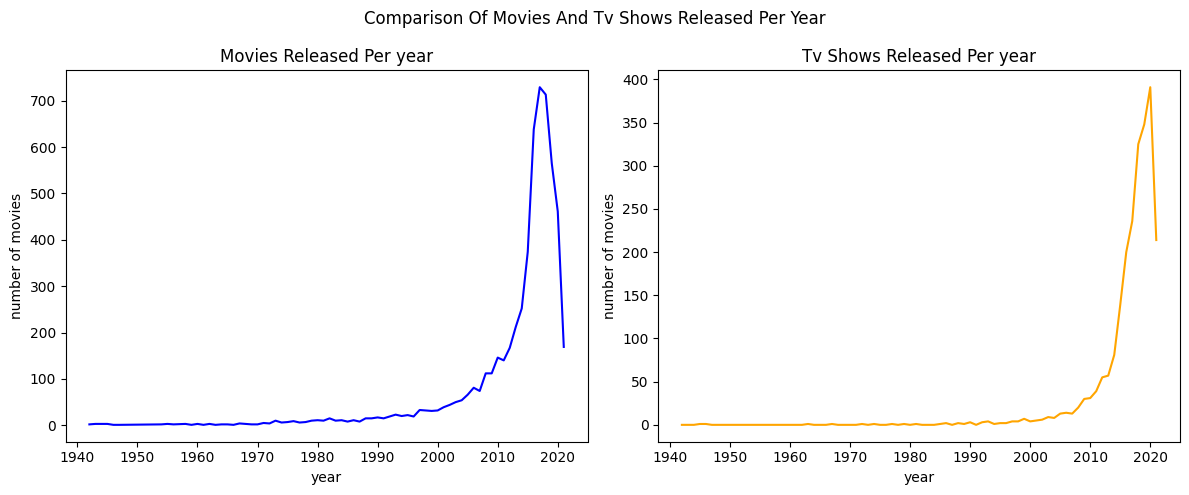

In [ ]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize =(8,6))
plt.barh(country_counts.index,country_counts.values,color='teal')
plt.title('top10 countries by number of shows')
plt.xlabel('Number Of shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10 countries.png')
plt.show()

content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0) #unstack convert row into column
fig ,ax = plt.subplots(1,2,figsize =(12,5))

#first_subplot: movies
ax[0].plot(content_by_year.index , content_by_year['Movie'],color = 'blue')
ax[0].set_title('Movies Released Per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('number of movies')

#2nd subplot : tvshows
ax[0].plot(content_by_year.index , content_by_year['TV Show'],color = 'orange')
ax[0].set_title('Tv Shows Released Per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('number of movies')

fig.suptitle('Comparison Of Movies And Tv Shows Released Per Year')
plt.tight_layout()
plt.savefig('movies_tv_shows_comparison.png')
plt.show()